In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#separate train and test train_test_split function' 
def train_test_split_local(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    train_test_split(y, shuffle=False)
    return X_train, X_test, y_train, y_test

def read(file_name, fheader, fuser, ftrial):
    fsadl1 = pd.read_csv(file_name, sep=' ', header=None)
    fdata = fsadl1.iloc[:, :243]
    fdata.columns = fheader
    fdata=fdata[fdata.columns[np.r_[0:45,50:58,63:71,76:84,89:97,102:133]]]
    flabels = fsadl1.iloc[:,243]
    ## Preprocessing data
    #find and remove rows with all nulls
    fidx=fdata.index[fdata.isnull().all(1)] #1 is the axis for rows
    #select data not in idx, that is data that is not all null
    fdata = fdata[~fdata.index.isin(fidx)] 
    #same for labels
    flabels = flabels[~flabels.index.isin(fidx)]

    #see how many there are of each label
    #what does it mean ?
    flabels.value_counts()


    #fill missing values
    fdata = fdata.fillna(method='ffill',axis=1)


    fdata['user'] = fuser
    fdata['trial'] = ftrial
    return fdata, flabels
    
def windowing(fdata, window_number, window_text, porcentage, flabels):
    ffiltered_data = fdata[columns].rolling(11).median()
    ffiltered_data['MILLISEC'] = fdata.MILLISEC


    # Windowing and Feature Extraction
    ffiltered_data['time']=pd.to_datetime(fdata.MILLISEC,unit='ms')
    ffiltered_data.index=ffiltered_data.time
    #calculate mean over a 1 second window
    keep = ffiltered_data.time.dt.microsecond/window_number %porcentage
    keep = keep - keep.shift() < 0

    means = ffiltered_data[columns].rolling(window_text).mean()[keep]
    means.columns = [str(col) + '_mean' for col in means.columns]
    variances = ffiltered_data[columns].rolling(window_text).var()[keep]
    variances.columns = [str(col) + '_var' for col in variances.columns]

    #talk about apply function
    flabels.index = ffiltered_data.time
    mode_labels = flabels.rolling(window_text).apply(lambda x:mode(x)[0])[keep]

    #all features
    fall_features = pd.concat([means, variances],axis=1)
    fall_features['label'] = mode_labels
    fall_features['user'] = user
    fall_features['trial'] = trial
    
    return fall_features, ffiltered_data

def plot_confusion_matrix(cm, names, title='MATRIZ DE CONFUSIÓN', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')

In [3]:
#Read data
path = 'dataset/' #enter thepath for the dataset folder
header_path = 'header.csv' #enter the path for the header file
header=pd.read_csv(header_path,names=['column',''])['column'].values
users = range(1,5)
trials = range(1,6)
all_data = pd.DataFrame()
filtered_data = pd.DataFrame()

In [4]:

for user in users:
    for trial in trials:
        file_name = path+'S'+str(user)+'-ADL'+str(trial)+'.dat'
        data, labels = read(file_name, header, user, trial)
        columns = data.columns[~data.columns.isin(['user', 'trial','MILLISEC'])]
        #we use a window of 11 elements
        # Filtering using median filter
        
        all_features, filtered_data_temp = windowing(data, 1000, '1S', 500, labels)
        all_data = pd.concat([all_data, all_features])
        filtered_data = pd.concat([filtered_data, filtered_data_temp])
    
    file_name = path+'S'+str(user)+'-Drill'+'.dat'
    data, labels = read(file_name, header, user, 7)
    
    columns = data.columns[~data.columns.isin(['user', 'trial','MILLISEC'])]
    #we use a window of 11 elements
    # Filtering using median filter
    all_features, filtered_data_temp = windowing(data, 1000, '1S', 500, labels )
    all_data = pd.concat([all_data, all_features])
    filtered_data = pd.concat([filtered_data, filtered_data_temp])
    

In [5]:
all_data

,Accelerometer_RKN^_accX_mean,Accelerometer_RKN^_accY_mean,Accelerometer_RKN^_accZ_mean,Accelerometer_HIP_accX_mean,Accelerometer_HIP_accY_mean,Accelerometer_HIP_accZ_mean,Accelerometer_LUA^_accX_mean,Accelerometer_LUA^_accY_mean,Accelerometer_LUA^_accZ_mean,Accelerometer_RUA__accX_mean,...,InertialMeasurementUnit_R-SHOE_Body_Az_var,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameX_var,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameY_var,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameZ_var,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameX_var,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameY_var,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameZ_var,label,user,trial
time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.500,1.050000e+02,9.616667e+02,-3.573333e+02,5.000000e-01,1.023167e+03,1.835000e+02,7.466667e+01,1.008667e+03,1.018333e+02,2.453333e+02,...,1.366667,21.766667,14.266667,9.600000,14.266667,21.766667,9.600000,0.0,1,1
1970-01-01 00:00:01.000,4.776190e+01,9.750000e+02,-3.178571e+02,1.061905e+01,1.005667e+03,1.554762e+02,4.761905e+01,1.004619e+03,8.614286e+01,2.394286e+02,...,17.747619,5822.990476,14.228571,309.290476,14.228571,5822.990476,309.290476,0.0,1,1
1970-01-01 00:00:01.500,-3.173333e+01,9.897000e+02,-2.747000e+02,2.093333e+01,1.007933e+03,1.330000e+02,1.196667e+01,1.006100e+03,9.416667e+01,2.448667e+02,...,2257.843678,18485.903448,38647.288506,2476.855172,38647.288506,18485.903448,2476.855172,0.0,1,1
1970-01-01 00:00:02.000,-8.363333e+01,9.920667e+02,-2.688333e+02,-1.293333e+01,1.018167e+03,8.950000e+01,-2.633333e+01,1.001300e+03,1.756667e+02,2.344667e+02,...,2173.636782,16930.562069,43889.972414,1953.374713,43889.972414,16930.562069,1953.374713,0.0,1,1
1970-01-01 00:00:02.500,-1.510000e+01,9.919333e+02,-2.799000e+02,2.600000e+01,1.018567e+03,7.193333e+01,-6.430000e+01,9.774000e+02,3.442333e+02,1.953667e+02,...,129.909195,605.075862,3338.764368,157.567816,3338.764368,605.075862,157.567816,0.0,1,1
1970-01-01 00:00:03.000,1.746667e+01,9.983000e+02,-2.758000e+02,9.496667e+01,1.009200e+03,1.158333e+02,-3.687667e+02,7.155000e+02,4.989000e+02,1.604000e+02,...,96.396552,646.947126,3108.074713,142.024138,3108.074713,646.947126,142.024138,0.0,1,1
1970-01-01 00:00:03.500,-2.540000e+01,9.901000e+02,-2.982667e+02,8.833333e+01,1.014633e+03,1.408667e+02,-4.695667e+02,3.643000e+02,4.478333e+02,1.947000e+02,...,2.179310,198.478161,50.524138,98.271264,50.524138,198.478161,98.271264,0.0,1,1
1970-01-01 00:00:04.000,-2.196667e+01,9.805667e+02,-3.105333e+02,1.118000e+02,1.003267e+03,1.900000e+02,-6.786667e+01,2.589667e+02,3.369333e+02,2.258667e+02,...,1.291954,154.254023,57.995402,88.464368,57.995402,154.254023,88.464368,0.0,1,1
1970-01-01 00:00:04.500,-2.283333e+01,9.782333e+02,-3.176333e+02,1.391000e+02,9.781000e+02,2.451000e+02,-1.357000e+02,2.867667e+02,5.762333e+02,-2.683333e+01,...,6.598851,101.903448,63.581609,62.188506,63.581609,101.903448,62.188506,0.0,1,1


In [6]:

all_data.label.value_counts()

1.0    23172
2.0    13218
0.0    10747
4.0     9119
5.0     1692
Name: label, dtype: int64

In [7]:
all_data.trial.value_counts()

5    22911
1    11513
3     7956
2     7863
4     7705
Name: trial, dtype: int64

In [8]:
all_data.user.value_counts()

1    15641
2    15010
3    14455
4    12842
Name: user, dtype: int64

In [9]:
data.describe()

,MILLISEC,Accelerometer_RKN^_accX,Accelerometer_RKN^_accY,Accelerometer_RKN^_accZ,Accelerometer_HIP_accX,Accelerometer_HIP_accY,Accelerometer_HIP_accZ,Accelerometer_LUA^_accX,Accelerometer_LUA^_accY,Accelerometer_LUA^_accZ,...,InertialMeasurementUnit_R-SHOE_Body_Ay,InertialMeasurementUnit_R-SHOE_Body_Az,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameX,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameY,InertialMeasurementUnit_R-SHOE_AngVelBody_FrameZ,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameX,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameY,InertialMeasurementUnit_R-SHOE_AngVelNav_FrameZ,user,trial
count,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,4.546000e+04,...,45460.000000,45460.000000,45460.000000,45460.000000,45460.000000,45460.000000,45460.000000,45460.000000,45460.0,45460.0
mean,7.576424e+05,7.205346e+04,7.273918e+04,7.213026e+04,7.473093e+03,8.570559e+03,7.912822e+03,5.460099e+03,5.830548e+03,5.107764e+03,...,527.461615,751.195139,15.213308,72.193445,46.187593,72.193445,-12.695095,46.187593,4.0,7.0
std,4.374395e+05,2.770680e+05,2.768902e+05,2.770482e+05,9.730875e+04,9.722217e+04,9.727437e+04,8.701798e+04,8.699683e+04,8.703878e+04,...,463.129698,421.830454,1651.352297,1028.671603,915.979974,1028.671603,1651.373576,915.979974,0.0,0.0
min,0.000000e+00,-2.240000e+03,-7.560000e+02,-1.907000e+03,-1.002000e+03,-5.700000e+01,-1.456000e+03,-2.500000e+02,-7.990000e+02,-1.076000e+03,...,-4985.000000,-5305.000000,-8661.000000,-13377.000000,-15677.000000,-13377.000000,-13458.000000,-15677.000000,4.0,7.0
25%,3.788215e+05,1.110000e+02,9.100000e+02,6.500000e+01,-3.380000e+02,8.510000e+02,1.390000e+02,3.220000e+02,7.490000e+02,-6.000000e+01,...,390.000000,694.000000,-43.000000,-42.000000,-44.000000,-42.000000,-75.000000,-44.000000,4.0,7.0
50%,7.576425e+05,2.090000e+02,1.010000e+03,2.510000e+02,-1.290000e+02,9.180000e+02,3.390000e+02,4.035000e+02,8.620000e+02,1.630000e+02,...,407.000000,799.000000,3.000000,3.000000,-3.000000,3.000000,-3.000000,-3.000000,4.0,7.0
75%,1.136464e+06,3.680000e+02,1.048000e+03,5.560000e+02,-4.800000e+01,9.710000e+02,4.580000e+02,5.570000e+02,9.380000e+02,2.830000e+02,...,547.000000,809.000000,77.000000,77.000000,46.000000,77.000000,44.000000,46.000000,4.0,7.0
max,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,1.515285e+06,...,7100.000000,5496.000000,13458.000000,9670.000000,6765.000000,9670.000000,8661.000000,6765.000000,4.0,7.0


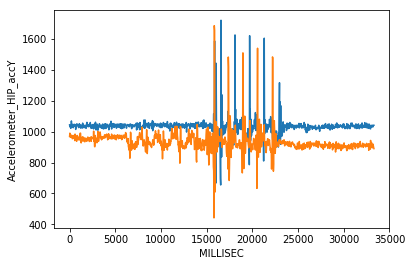

In [10]:
#Plot explore other features
sns.lineplot(x='MILLISEC',y='Accelerometer_RKN^_accY', data=data[:1000])
sns.lineplot(x='MILLISEC',y='Accelerometer_HIP_accY', data=data[:1000])

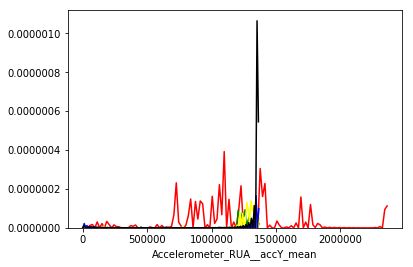

In [11]:
#explore the data
all_data.label.value_counts()

#separate by class, see feature mean
all_data_0 = all_data[all_data.label==0]
all_data_1 = all_data[all_data.label==1]
all_data_2 = all_data[all_data.label==2]
all_data_4 = all_data[all_data.label==4]
all_data_5 = all_data[all_data.label==5]

draw_col = 10
sns.distplot(all_data_0.iloc[:,draw_col], hist=False, kde=True, color='red')
sns.distplot(all_data_1.iloc[:,draw_col], hist=False, kde=True, color='green')
sns.distplot(all_data_2.iloc[:,draw_col], hist=False, kde=True, color='yellow')
sns.distplot(all_data_4.iloc[:,draw_col], hist=False, kde=True, color='blue')
sns.distplot(all_data_5.iloc[:,draw_col], hist=False, kde=True, color='black')

In [12]:
# Excercise 1
# Random train test split

# Labels are the values we want to predict
labels = np.array(all_data['label'])

# Remove the labels from the features
# axis 1 refers to the columns
features = all_data.drop('label', axis = 1)
features = features.drop('user', axis = 1)
features = features.drop('trial', axis = 1)


# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)


X_train, X_test, y_train, y_test = train_test_split_local(features, labels)

In [13]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (38825, 214)
X_test: (19123, 214)
y_train: (38825,)
y_test: (19123,)


In [14]:

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

In [15]:

print("\n _______________________________________________________")  
print("confusion matrix: \n")  
print(confusion_matrix(y_test,y_pred))  
print("\n _______________________________________________________")  
print("classification report: \n")  
print(classification_report(y_test,y_pred))  
print("\n _______________________________________________________")  
print("accuracy score: \n")  
print(accuracy_score(y_test, y_pred))


 _______________________________________________________
confusion matrix: 

[[3169  176  171   19    6]
 [  29 7166  410    7    0]
 [  62  742 3633    4    0]
 [  13   77   17 2842    4]
 [   9    1    1    6  559]]

 _______________________________________________________
classification report: 

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      3541
         1.0       0.88      0.94      0.91      7612
         2.0       0.86      0.82      0.84      4441
         4.0       0.99      0.96      0.97      2953
         5.0       0.98      0.97      0.98       576

   micro avg       0.91      0.91      0.91     19123
   macro avg       0.93      0.92      0.93     19123
weighted avg       0.91      0.91      0.91     19123


 _______________________________________________________
accuracy score: 

0.9082779898551483


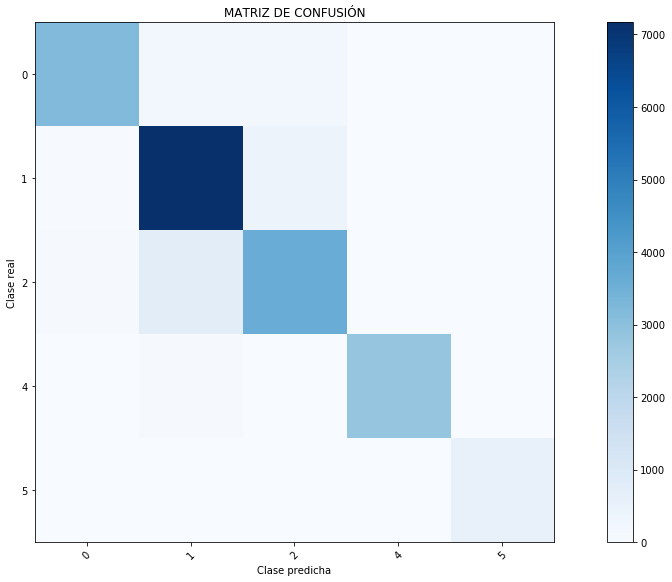

In [16]:
labels = [0,1,2,4,5]
plt.figure(figsize=(15,8))
plot_confusion_matrix(confusion_matrix(y_test,y_pred), labels)

In [17]:
# Excercise 1
# user 1 2 3 train test 4

# Labels are the values we want to predict
# Remove the labels from the features
# axis 1 refers to the columns

user123 = all_data[all_data['user'].isin([1, 2, 3])]
user4 = all_data[all_data['user'].isin([4])]


y_train_2 = np.array(user123['label'])
y_test_2 = np.array(user4['label'])

user123 = user123.drop('label', axis = 1)
user123 = user123.drop('user', axis = 1)
user123 = user123.drop('trial', axis = 1)

user4 = user4.drop('label', axis = 1)
user4 = user4.drop('user', axis = 1)
user4 = user4.drop('trial', axis = 1)

X_train_2 = np.array(user123)
X_test_2 = np.array(user4)



In [18]:
print('X_train_2:', X_train_2.shape)
print('X_test_2:', X_test_2.shape)
print('y_train_2:', y_train_2.shape)
print('y_test_2:', y_test_2.shape)

X_train_2: (45106, 214)
X_test_2: (12842, 214)
y_train_2: (45106,)
y_test_2: (12842,)


In [19]:

classifier2 = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier2.fit(X_train_2, y_train_2)  
y_pred_2 = classifier2.predict(X_test_2)

In [20]:
print("\n _______________________________________________________")  
print("confusion matrix: \n")  
print(confusion_matrix(y_test_2,y_pred_2))  
print("\n _______________________________________________________")  
print("classification report: \n")  
print(classification_report(y_test_2,y_pred_2))  
print("\n _______________________________________________________")  
print("accuracy score: \n")  
print(accuracy_score(y_test_2, y_pred_2))


 _______________________________________________________
confusion matrix: 

[[1950  796  277   13    0]
 [ 102 4411  590   16    0]
 [  58  367 2325    3    0]
 [  70  115   41 1355    0]
 [ 116    6    4   35  192]]

 _______________________________________________________
classification report: 

              precision    recall  f1-score   support

         0.0       0.85      0.64      0.73      3036
         1.0       0.77      0.86      0.82      5119
         2.0       0.72      0.84      0.78      2753
         4.0       0.95      0.86      0.90      1581
         5.0       1.00      0.54      0.70       353

   micro avg       0.80      0.80      0.80     12842
   macro avg       0.86      0.75      0.79     12842
weighted avg       0.81      0.80      0.79     12842


 _______________________________________________________
accuracy score: 

0.7968384986762187


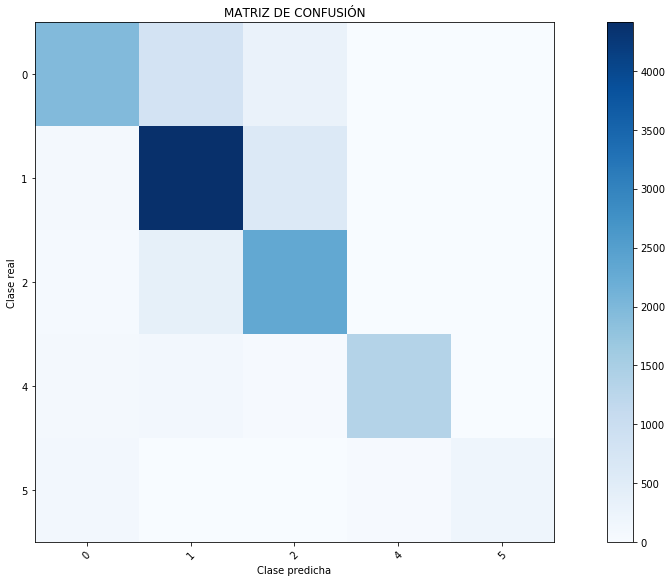

In [21]:
labels = [0,1,2,4,5]
plt.figure(figsize=(15,8))
plot_confusion_matrix(confusion_matrix(y_test_2,y_pred_2), labels)

In [22]:
# Excercise 1
#  1,2,3 and drill session as training data and trials 4 and 5 as test data.

# Labels are the values we want to predict
# Remove the labels from the features
# axis 1 refers to the columns

trial1237 = all_data[all_data['trial'].isin([1, 2, 3, 7])]
trial45 = all_data[all_data['trial'].isin([4, 5])]

y_train_3 = np.array(trial1237['label'])
y_test_3 = np.array(trial45['label'])

trial1237 = trial1237.drop('label', axis = 1)
trial1237 = trial1237.drop('user', axis = 1)
trial1237 = trial1237.drop('trial', axis = 1)

trial45 = trial45.drop('label', axis = 1)
trial45 = trial45.drop('user', axis = 1)
trial45 = trial45.drop('trial', axis = 1)

X_train_3 = np.array(trial1237)
X_test_3 = np.array(trial45)



In [23]:
print('X_train_3:', X_train_3.shape)
print('X_test_3:', X_test_3.shape)
print('y_train_3:', y_train_3.shape)
print('y_test_3:', y_test_3.shape)

X_train_3: (27332, 214)
X_test_3: (30616, 214)
y_train_3: (27332,)
y_test_3: (30616,)


In [24]:

classifier = RandomForestClassifier(n_estimators=20, random_state=0)  
classifier.fit(X_train_3, y_train_3)  
y_pred_3 = classifier.predict(X_test_3)

In [25]:

print("\n _______________________________________________________")  
print("confusion matrix: \n")  
print(confusion_matrix(y_test_3,y_pred_3))  
print("\n _______________________________________________________")  
print("classification report: \n")  
print(classification_report(y_test_3,y_pred_3))  
print("\n _______________________________________________________")  
print("accuracy score: \n")  
print(accuracy_score(y_test_3, y_pred_3))


 _______________________________________________________
confusion matrix: 

[[ 3721   507   253    69    17]
 [  257 12409   534    26     0]
 [  292  2013  5715     5     0]
 [   69   440    60  3592     4]
 [    6     0     0    12   615]]

 _______________________________________________________
classification report: 

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      4567
         1.0       0.81      0.94      0.87     13226
         2.0       0.87      0.71      0.78      8025
         4.0       0.97      0.86      0.91      4165
         5.0       0.97      0.97      0.97       633

   micro avg       0.85      0.85      0.85     30616
   macro avg       0.89      0.86      0.87     30616
weighted avg       0.86      0.85      0.85     30616


 _______________________________________________________
accuracy score: 

0.8509276195453358


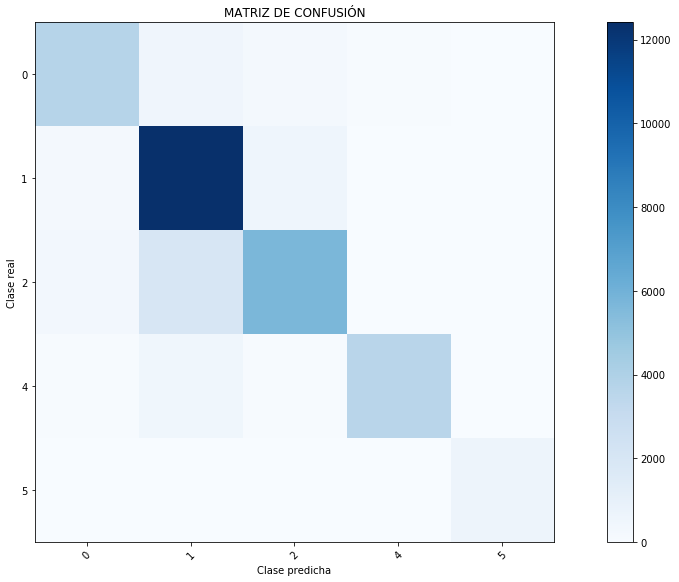

In [26]:
labels = [0,1,2,4,5]
plt.figure(figsize=(15,8))
plot_confusion_matrix(confusion_matrix(y_test_3,y_pred_3), labels)